# autocorrelation

From markov chain CLT,the error is given by,
\begin{equation}
\sigma ^{2}=\rho _{0}+2\sum_{k=1}^{\infty}\rho_{k}
\end{equation}
The autocorrelation function is
\begin{equation}
\rho_{f} (\tau )=\frac{covariance}{variance}=\frac{\sum_{n=1}^{N-\tau}(f_{n}-\mu_{f} )(f_{n+\tau }-\mu_{f} )}{\sum_{n=1}^{N}(f_{n}-\mu_{f} )^{2}}
\end{equation}
the sample mean,
\begin{equation}
\mu _{f}=\frac{1}{N}\sum_{n=1}^{N}f_{n}
\end{equation}



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
result=[]
eres=[]
def acf(x, nlag):
  result.clear()
  for lag in range(nlag):
    x1 = x[:(len(x)-lag)]
    x2 = x[lag:]
    sum_product = np.sum((x1-np.mean(x))*(x2-np.mean(x)))
    ans=sum_product / (len(x) * np.var(x))
    result.append(ans)
  return result


    

# Pseudo-Convergence

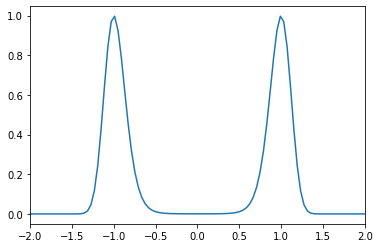

In [ ]:

def c(gamma):
  return lambda x:fun(gamma,x)
def fun(gamma,x):
  return np.exp(-gamma*(x*x-1)*(x*x-1))
u=c(8)
x=np.linspace(-2,2,100)
plt.xlim(-2,2)
plt.plot(x,u(x),label="potential function")

In [ ]:
q=0
def MH(target,sd=0.1,initial=1,m=100000):
  np.seterr(divide='ignore')
  np.random.seed(1693)
  global q
  a,r=0,0
  x=initial
  xv=np.zeros(m)
  for i in range(m):
    can=x+np.random.normal(0.0,sd,1)
    logA=-np.log(target(x))+np.log(target(can))
    if (np.log(np.random.uniform(0.0,1.0))<logA):
      x=can
      a+=1
    else:
      r+=1
    xv[i]=x
  q=100*a/(a+r)
  return xv

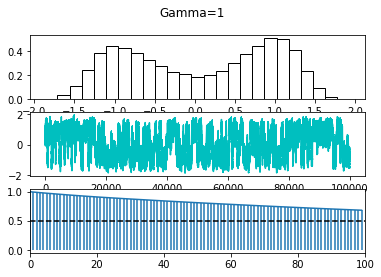

<Figure size 432x288 with 0 Axes>

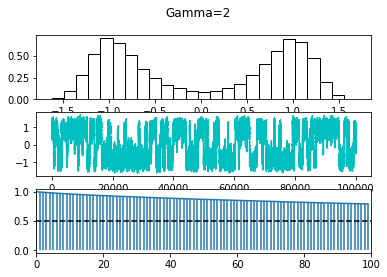

<Figure size 432x288 with 0 Axes>

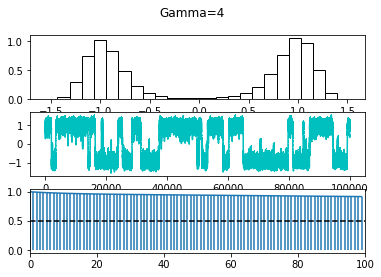

<Figure size 432x288 with 0 Axes>

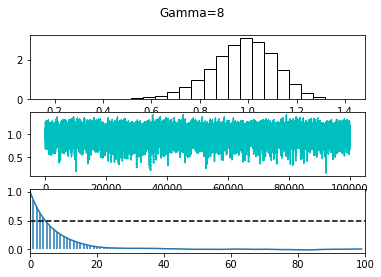

<Figure size 432x288 with 0 Axes>

In [ ]:
 
temp=np.power(2,range(0,4))
mt=map(MH,map(c,temp))
d=1
for i in mt:
  fig,(ax1,ax2,ax3)=plt.subplots(3)
  fig.suptitle('Gamma=%s'%d)
  d=d*2
  plt.xlim(-2,2)
  ax1.hist(i,bins=25,density=True,edgecolor='k',facecolor='w')
  ax2.plot(range(100000),i,'-,',color='c')
  acf(i,100)
  plt.xlim(0,100)
  ax3.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
  ax3.axhline(y=0.5,linestyle='--',color='k')
  plt.figure()

# standard deviation
increasing standard deviation means that it takes larger steps which decreases the density at proposed values consequently decreasing the probability of acceptance

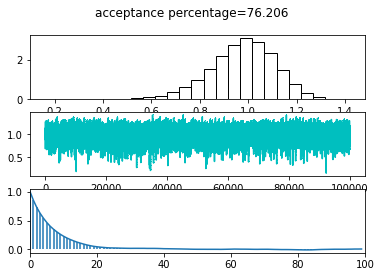

<Figure size 432x288 with 0 Axes>

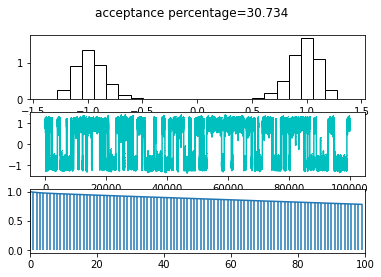

<Figure size 432x288 with 0 Axes>

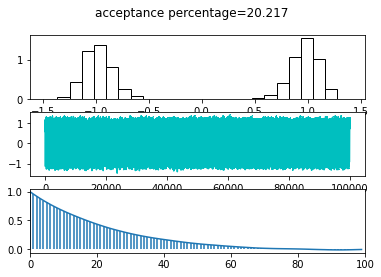

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in [0.1,0.3,0.5,0.7,0.9]:
  np.seterr(divide = 'ignore') 
  mt1=MH(lambda x:fun(8,x),i,1)
  acf(mt1,100)
  fig,(ax1,ax2,ax3)=plt.subplots(3)
  fig.suptitle('acceptance percentage=%s'%q)
  plt.xlim(-2,2)
  ax1.hist(mt1,bins=25,density=True,edgecolor='k',facecolor='w')
  ax2.plot(range(100000),mt1,'-,',color='c')
  acf(mt1,100)
  plt.xlim(0,100)
  ax3.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
  plt.figure()

# Thinning
Thinning is technique that is used to reduce autocorrelation by picking up every Kth sample.There are some counter-productive effects of thinning say less precised moments.
standard deviation is 
\begin{equation}
SD=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}}
\end{equation}
standard error of the mean is calculated as
\begin{equation}
SEM=\frac{\sigma}{\sqrt{n}}
\end{equation}

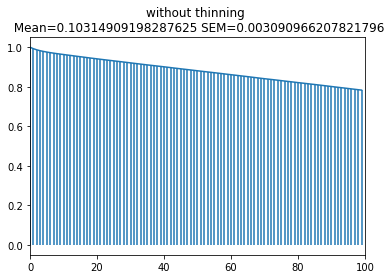

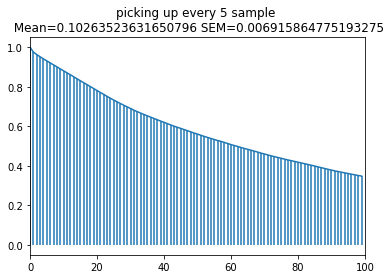

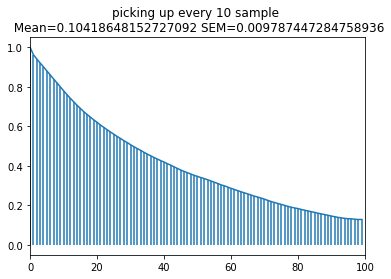

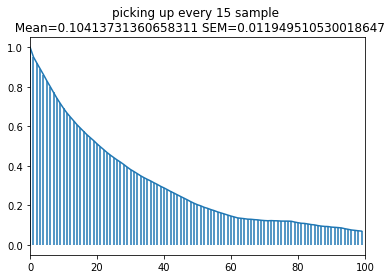

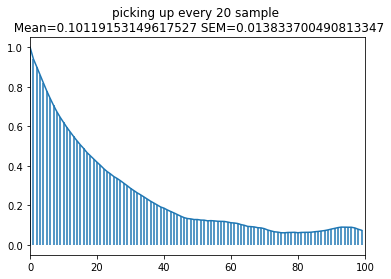

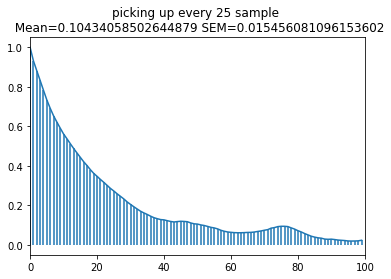

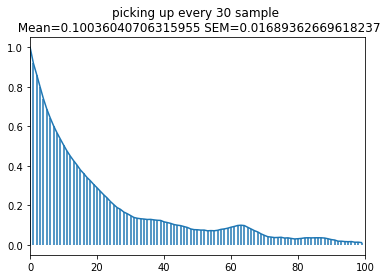

<Figure size 432x288 with 0 Axes>

In [ ]:

mt2=MH(lambda x:fun(8,x),0.5)
plt.title('without thinning \n Mean=%s SEM=%s'%(np.mean(mt2),np.std(mt2)/(len(mt2)-1)**0.5))
acf(mt2,100)
plt.xlim(0,100)
plt.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
plt.figure()
for i in range(1,7):
  mt21=mt2[0::(5*i)]
  plt.title('picking up every %s sample \n Mean=%s SEM=%s'%(5*i,np.mean(mt21),np.std(mt21)/(len(mt21)-1)**0.5))
  acf(mt21,100)
  plt.xlim(0,100)
  plt.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
  plt.figure()


# Burn-in

Burn-in is a technique of discarding first n samples to reach its equilibrium distribution. Burn-in technique helps in reducing auto correlation.
**disadvantage**:Need to know where the region of high probability is.


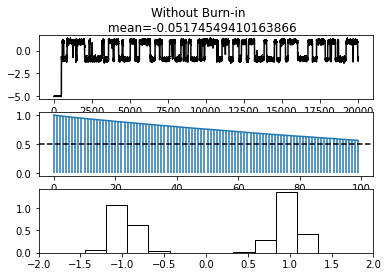

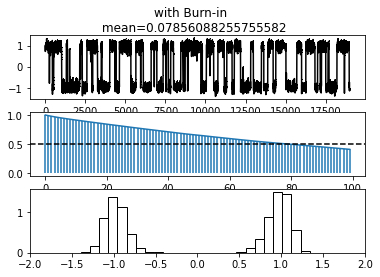

In [ ]:
 
mt3=MH(lambda x:fun(8,x),0.6,-5,20000)
fig,(ax1,ax2,ax3)=plt.subplots(3)
fig.suptitle('Without Burn-in \n mean=%s'%np.mean(mt3))
ax1.plot(range(20000),mt3,'-,',color='k')
acf(mt3,100)
plt.xlim(0,100)
ax2.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
ax2.axhline(y=0.5,linestyle='--',color='k')
plt.xlim(-2,2)
ax3.hist(mt3,bins=25,density=True,edgecolor='k',facecolor='w')
mt31=list(mt3)
 
mt31=mt31[1000:]
fig,(ax1,ax2,ax3)=plt.subplots(3)
fig.suptitle('with Burn-in \n mean=%s'%np.mean(mt31))
ax1.plot(range(19000),mt31,'-,',color='k')
acf(mt31,100)
plt.xlim(0,100)
ax2.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
ax2.axhline(y=0.5,linestyle='--',color='k')
plt.xlim(-2,2)
ax3.hist(mt31,bins=25,density=True,edgecolor='k',facecolor='w')
np.warnings.filterwarnings('ignore')


# Heavy tails

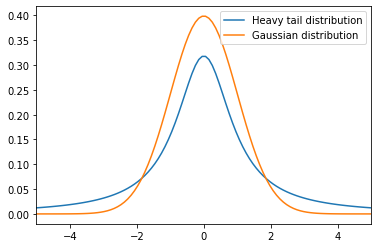

<Figure size 432x288 with 0 Axes>

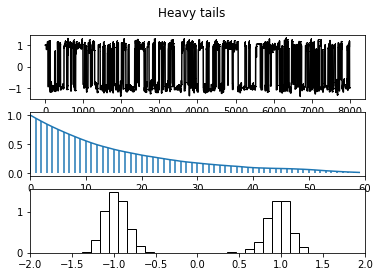

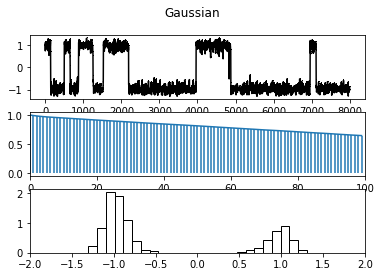

In [ ]:
import math
def gaus(x):
  return (np.exp(-x*x/2))/(math.sqrt(2*math.pi))

def pt(x):
  return (1/(math.pi*(x*x+1)))
x=np.linspace(-5,5,100)
plt.xlim(-5,5)
plt.plot(x,pt(x),label='Heavy tail distribution')
plt.plot(x,gaus(x),label='Gaussian distribution')
plt.legend()
plt.figure()

#heavy tails

q=0
def MH1(target,initial=1,m=100000):
  np.random.seed(1693)
  global q
  a,r=0,0
  x=initial
  xv=np.zeros(m)
  for i in range(m):
    can=x+np.random.standard_cauchy(1)
    logA=-np.log(target(x))+np.log(target(can))
    if (np.log(np.random.uniform(0.0,1.0))<logA):
      x=can
      a+=1
    else:
      r+=1
    xv[i]=x
  q=100*a/(a+r)
  return xv

mt4=MH1(lambda x:fun(8,x),1,8000)
fig,(ax1,ax2,ax3)=plt.subplots(3)
fig.suptitle('Heavy tails')
ax1.plot(range(8000),mt4,'-,',color='k')
acf(mt4,60)
ax2.set_xlim(0,60)
ax2.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
ax3.set_xlim(-2,2)
ax3.hist(mt4,bins=25,density=True,edgecolor='k',facecolor='w')

#with gaussian

mt5=MH(lambda x:fun(8,x),0.5,1,8000)
fig,(ax1,ax2,ax3)=plt.subplots(3)
fig.suptitle('Gaussian')
ax1.plot(range(8000),mt5,'-,',color='k')
acf(mt5,100)
ax2.set_xlim(0,100)
ax2.stem(result,use_line_collection=True, basefmt=" ",markerfmt="")
ax3.set_xlim(-2,2)
ax3.hist(mt5,bins=25,density=True,edgecolor='k',facecolor='w')

np.warnings.filterwarnings('ignore')